In [6]:
import pandas as pd

df = pd.read_csv('Market_Basket_Optimisation.csv', sep=',')
df.head()

,item1,item2,item3,item4,item5,item6,item7,item8,item9,item10,item11,item12,item13,item14,item15,item16,item17,item18,item19,item20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item1   7501 non-null   object
 1   item2   5747 non-null   object
 2   item3   4389 non-null   object
 3   item4   3345 non-null   object
 4   item5   2529 non-null   object
 5   item6   1864 non-null   object
 6   item7   1369 non-null   object
 7   item8   981 non-null    object
 8   item9   654 non-null    object
 9   item10  395 non-null    object
 10  item11  256 non-null    object
 11  item12  154 non-null    object
 12  item13  87 non-null     object
 13  item14  47 non-null     object
 14  item15  25 non-null     object
 15  item16  8 non-null      object
 16  item17  4 non-null      object
 17  item18  4 non-null      object
 18  item19  3 non-null      object
 19  item20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [8]:
transactions =  df.apply(lambda x: x.dropna().tolist()) 

transactions

item1     [shrimp, burgers, chutney, turkey, mineral wat...
item2     [almonds, meatballs, avocado, milk, french fri...
item3     [avocado, eggs, energy bar, shallot, green tea...
item4     [vegetables mix, whole wheat rice, eggs, honey...
item5     [green grapes, green tea, cooking oil, oil, mi...
item6     [whole weat flour, cooking oil, black tea, cho...
item7     [yams, low fat yogurt, salmon, shampoo, white ...
item8     [cottage cheese, eggs, toothpaste, frozen smoo...
item9     [energy drink, chicken, escalope, soup, energy...
item10    [tomato juice, extra dark chocolate, milk, fre...
item11    [low fat yogurt, olive oil, eggs, pancakes, to...
item12    [green tea, salt, low fat yogurt, fresh bread,...
item13    [honey, fresh bread, hot dogs, low fat yogurt,...
item14    [salad, green tea, hot dogs, salt, mint, oil, ...
item15    [mineral water, cereals, salmon, candy bars, c...
item16    [salmon, chocolate, antioxydant juice, frozen ...
item17    [antioxydant juice, frozen smo

In [23]:
print(transactions[:5])

[['shrimp', 'burgers', 'chutney', 'turkey', 'mineral water', 'low fat yogurt', 'whole wheat pasta', 'soup', 'frozen vegetables', 'french fries', 'eggs', 'cookies', 'turkey', 'spaghetti', 'mineral water', 'mineral water', 'shrimp', 'turkey', 'turkey', 'meatballs', 'red wine', 'rice', 'spaghetti', 'burgers', 'eggs', 'parmesan cheese', 'ground beef', 'sparkling water', 'mineral water', 'frozen vegetables', 'herb & pepper', 'mineral water', 'turkey', 'frozen vegetables', 'cookies', 'pickles', 'energy bar', 'red wine', 'mineral water', 'pickles', 'spaghetti', 'fresh tuna', 'spaghetti', 'soup', 'escalope', 'soup', 'mineral water', 'mineral water', 'avocado', 'burgers', 'spaghetti', 'fresh tuna', 'spaghetti', 'spaghetti', 'french fries', 'tomato sauce', 'turkey', 'eggs', 'soup', 'turkey', 'spaghetti', 'clothes accessories', 'energy drink', 'soup', 'turkey', 'french fries', 'chocolate', 'herb & pepper', 'cookies', 'shrimp', 'grated cheese', 'burgers', 'cookies', 'yogurt cake', 'soup', 'cookies

In [11]:
# pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.4 MB 1.9 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.4 MB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te_model = te.fit(transactions)
 
rows = te_model.transform(transactions)

df_transactions = pd.DataFrame(rows, columns=te_model.columns_)
print(df_transactions.shape)

(20, 120)


In [13]:
df_transactions.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,True,True,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,False
1,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,False,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
3,False,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
4,False,True,True,True,True,True,True,True,True,True,...,False,True,False,True,True,True,True,True,True,True


In [14]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_transactions, min_support=0.005, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

C:\Users\user\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\user\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\user\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\executing\executing.py:713: DeprecationWarning: ast.Str is deprecated and will be removed in Python 3.14; use ast.Constant instead
  right=ast.Str(s=sentinel),
C:\Users\user\anaconda3\Lib\ast.py:587: DeprecationWarning: Attribute s is deprecated and will be removed in Python 3.14; use value instead
  return Constant(*args, **kwargs)


MemoryError: Unable to allocate 17.4 GiB for an array with shape (186683156, 5, 20) and data type bool

In [27]:
# Example: Work with a sample of the data
df_sampled = df_transactions.sample(frac=0.1, random_state=42) 

In [24]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_sampled, min_support=0.005, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

MemoryError: cannot allocate array memory

In [28]:
from mlxtend.preprocessing import TransactionEncoder

# Example transactions
transactions = [
    ['milk', 'bread', 'butter'],
    ['bread', 'butter'],
    ['milk', 'bread']
]

# Convert to one-hot encoded DataFrame
te = TransactionEncoder()
df = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

In [29]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.005, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

frequent_itemsets

,support,itemsets,length
0,1.000000,(bread),1
1,0.666667,(butter),1
2,0.666667,(milk),1
3,0.666667,"(butter, bread)",2
4,0.666667,"(milk, bread)",2
5,0.333333,"(milk, butter)",2
6,0.333333,"(butter, milk, bread)",3


In [34]:
pip install --upgrade mlxtend

In [38]:
from mlxtend.frequent_patterns import association_rules

# Calculate the number of itemsets in the frequent_itemsets DataFrame
frequent_itemsets['num_itemsets'] = frequent_itemsets['itemsets'].apply(len)

# Generate association rules with num_itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.55, num_itemsets=None)

# Sort the rules by confidence in descending order
rules = rules.sort_values(by='confidence', ascending=False)

# Display the sorted rules
print(rules)

      antecedents consequents  antecedent support  consequent support  \
0        (butter)     (bread)            0.666667            1.000000   
2          (milk)     (bread)            0.666667            1.000000   
4  (milk, butter)     (bread)            0.333333            1.000000   
1         (bread)    (butter)            1.000000            0.666667   
3         (bread)      (milk)            1.000000            0.666667   

    support  confidence  lift  representativity  leverage  conviction  \
0  0.666667    1.000000   1.0               1.0       0.0         inf   
2  0.666667    1.000000   1.0               1.0       0.0         inf   
4  0.333333    1.000000   1.0               1.0       0.0         inf   
1  0.666667    0.666667   1.0               1.0       0.0         1.0   
3  0.666667    0.666667   1.0               1.0       0.0         1.0   

   zhangs_metric   jaccard  certainty  kulczynski  
0            0.0  0.666667        0.0    0.833333  
2            0.0  

C:\Users\user\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:182: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


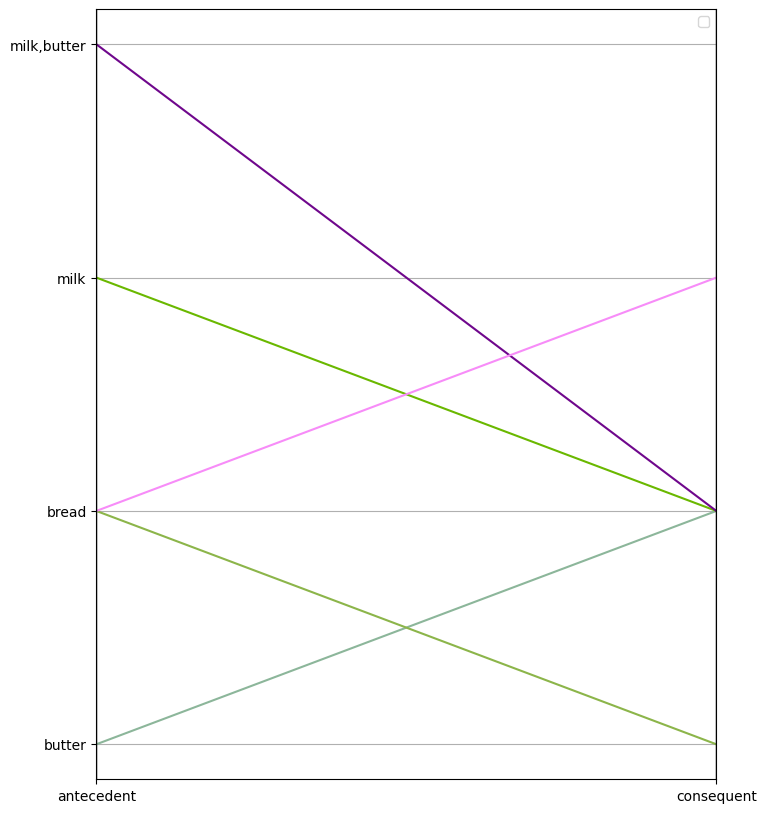

In [39]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

rules['antecedent'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))

rules['consequent'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules['rule_n'] = rules.index

coords=rules[['antecedent','consequent','rule_n']]

plt.figure(figsize=(8,10))

parallel_coordinates(coords, 'rule_n')

plt.legend([])

plt.grid(True)
plt.show()

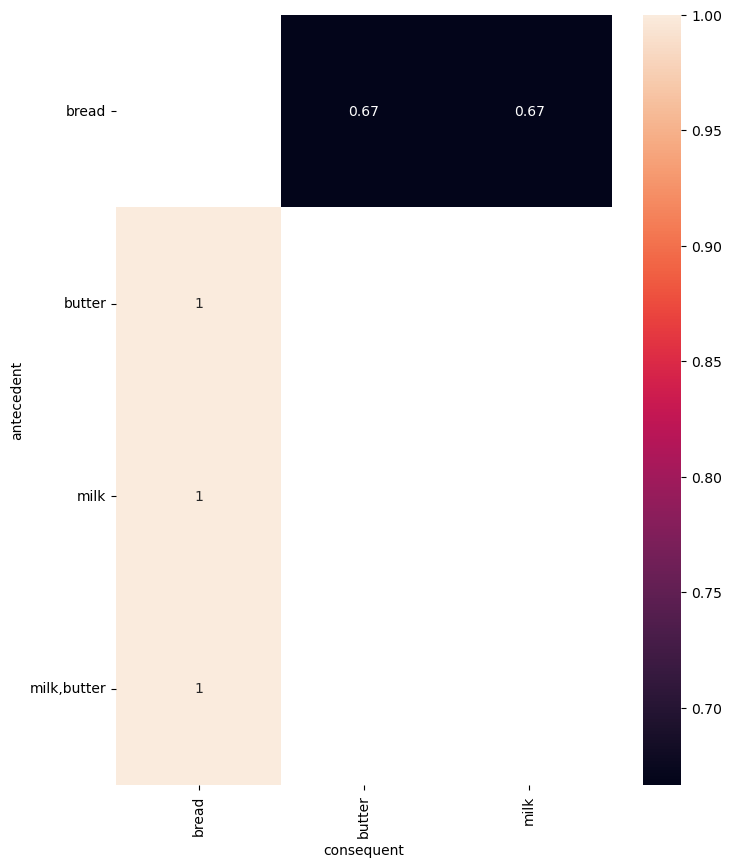

In [40]:
import seaborn as sns

pivot = rules.pivot(index = 'antecedent', columns = 'consequent', values= 'confidence')

plt.figure(figsize=(8,10))

sns.heatmap(pivot, annot = True)

plt.yticks(rotation=0)

plt.xticks(rotation=90)
plt.show()

In [41]:
def predict(items, rules, max_results= 6):
    
    preds = rules[rules['antecedents'] == items]
    
    preds = preds[['consequent','confidence']]
    
    preds.sort_values('confidence', ascending=False)
    
    return preds[:max_results]

In [48]:
preds = predict({'bread', 'milk'}, rules)
preds

,consequent,confidence
